In [2]:
import pandas as pd
df = pd.read_csv('car_sales.csv')
df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


Bu veri setinde Price sütunu $ işareti içerdiğinden 1 Nf formatına uygun değildir. Bu yüzden bu karakteri kaldırma işelmini yapıyoruz.

In [3]:
df['Price']=df['Price'].str.replace("$","").str.replace(",","").astype(float).astype(int)
df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [4]:
# Satış Tarihi ekleme işlemi
df['Sale Date'] = pd.date_range(start='2024-01-01', periods=len(df))
df

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2024-01-01
1,Honda,Red,87899,4,5000,2024-01-02
2,Toyota,Blue,32549,3,7000,2024-01-03
3,BMW,Black,11179,5,22000,2024-01-04
4,Nissan,White,213095,4,3500,2024-01-05
5,Toyota,Green,99213,4,4500,2024-01-06
6,Honda,Blue,45698,4,7500,2024-01-07
7,Honda,Blue,54738,4,7000,2024-01-08
8,Toyota,White,60000,4,6250,2024-01-09
9,Nissan,White,31600,4,9700,2024-01-10


In [5]:
df['Total Sale'] = df['Price'].cumsum()
df

# Total Sale, Price sütunu için kümülatif toplamı bulur.

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sale
0,Toyota,White,150043,4,4000,2024-01-01,4000
1,Honda,Red,87899,4,5000,2024-01-02,9000
2,Toyota,Blue,32549,3,7000,2024-01-03,16000
3,BMW,Black,11179,5,22000,2024-01-04,38000
4,Nissan,White,213095,4,3500,2024-01-05,41500
5,Toyota,Green,99213,4,4500,2024-01-06,46000
6,Honda,Blue,45698,4,7500,2024-01-07,53500
7,Honda,Blue,54738,4,7000,2024-01-08,60500
8,Toyota,White,60000,4,6250,2024-01-09,66750
9,Nissan,White,31600,4,9700,2024-01-10,76450


### Yıllık Satış Trendleri: Toplam Satışların Zaman İçindeki Değişimi

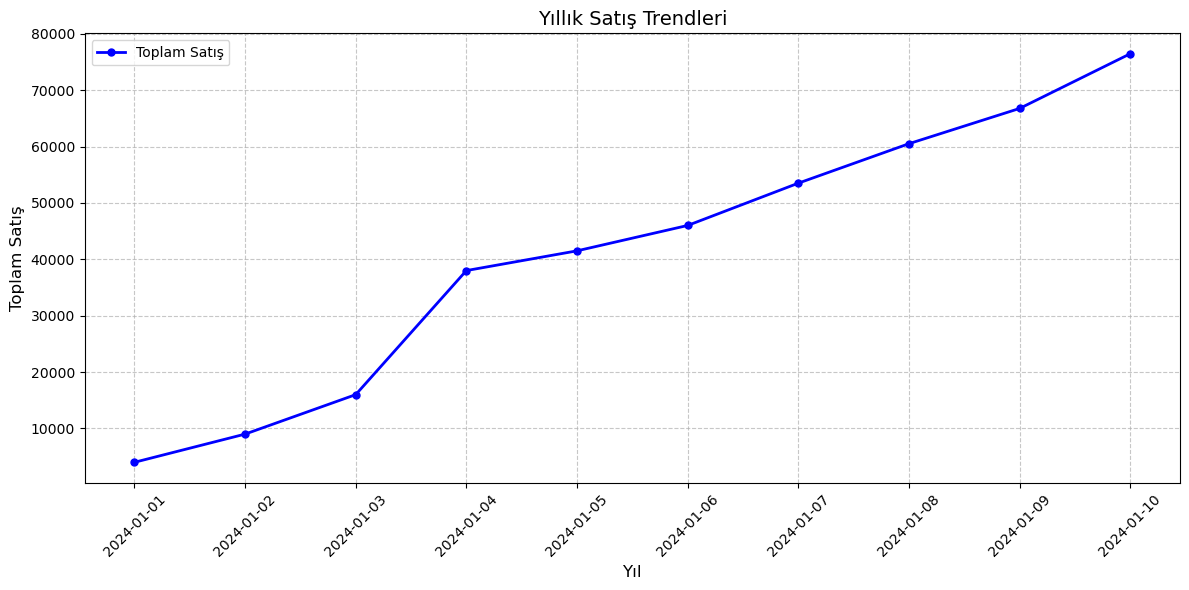

In [9]:
import matplotlib.pyplot as plt

year = df['Sale Date']
sale = df['Total Sale']

# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.plot(year, sale, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5)

# Başlık ve etiketler
plt.title('Yıllık Satış Trendleri', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Toplam Satış', fontsize=12)

# Grid ve Legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Toplam Satış'], loc='best')

# Tarihleri daha okunabilir hale getirmek için
plt.xticks(rotation=45)

# Grafik gösterimi
plt.tight_layout()  # Alt boşlukları otomatik ayarlama
plt.show()


### Araçların Kilometre Sayacı ile Fiyatları Arasındaki İlişki

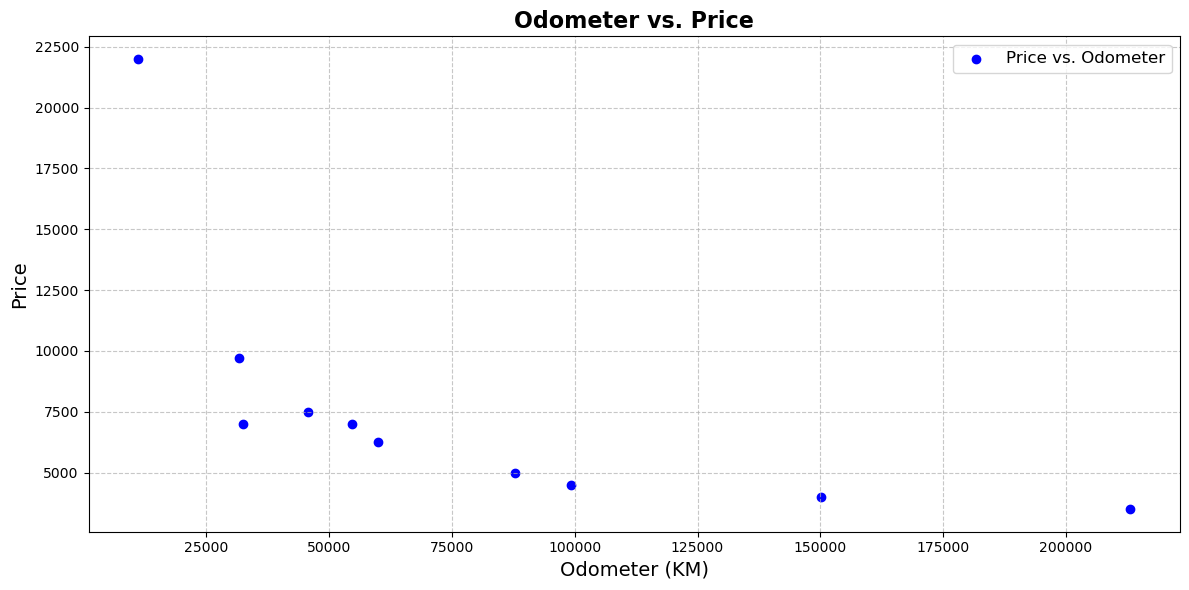

In [15]:
import matplotlib.pyplot as plt

# Scatter plot oluşturma
plt.figure(figsize=(12, 6))
plt.scatter(df['Odometer (KM)'], df['Price'], marker='o', color='b', label='Price vs. Odometer')

# Eksen etiketleri ve başlık
plt.xlabel('Odometer (KM)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Odometer vs. Price', fontsize=16, fontweight='bold')

# Grid ayarları
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend(fontsize=12)

# Layout ayarları
plt.tight_layout()

# Grafik gösterimi
plt.show()


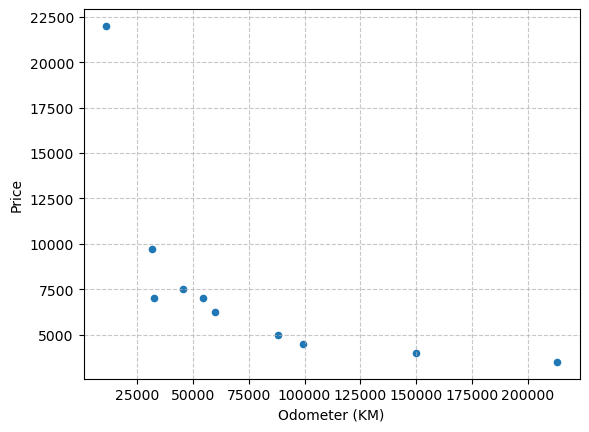

In [20]:
df.plot(x = "Odometer (KM)", y= "Price",kind="scatter");  # üstteki grafiğin paramtere ile çizdirilmesi
# Grid ayarları
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend

# Layout ayarları
plt.tight_layout

# Grafik gösterimi
plt.show()

### Araç Markalarına Göre Ortalama Fiyatların Dağılımı

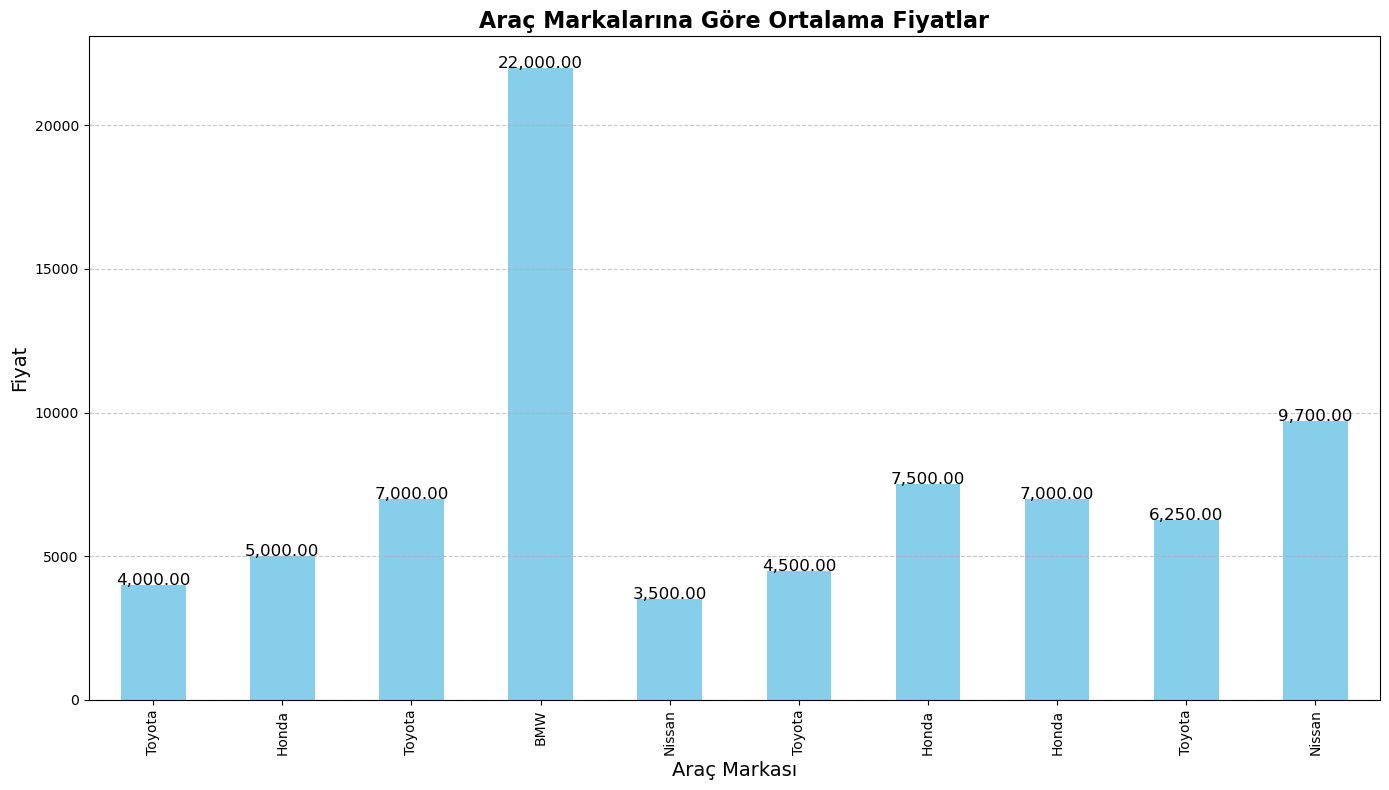

In [22]:
import matplotlib.pyplot as plt

# Bar grafiği oluşturma
ax = df.plot(x='Make', y='Price', kind='bar', color='skyblue', figsize=(14, 8), legend=False)

# Başlık ve etiketler
ax.set_title('Araç Markalarına Göre Ortalama Fiyatlar', fontsize=16, fontweight='bold')
ax.set_xlabel('Araç Markası', fontsize=14)
ax.set_ylabel('Fiyat', fontsize=14)

# Barları etiketlemek için
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.1, f'{i.get_height():,.2f}', ha='center', fontsize=12)

# Grid ve layout ayarları
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Alt boşlukları otomatik ayarlama

# Grafik gösterimi
plt.show()


### Marka ve Renk Dağılım Grafiği

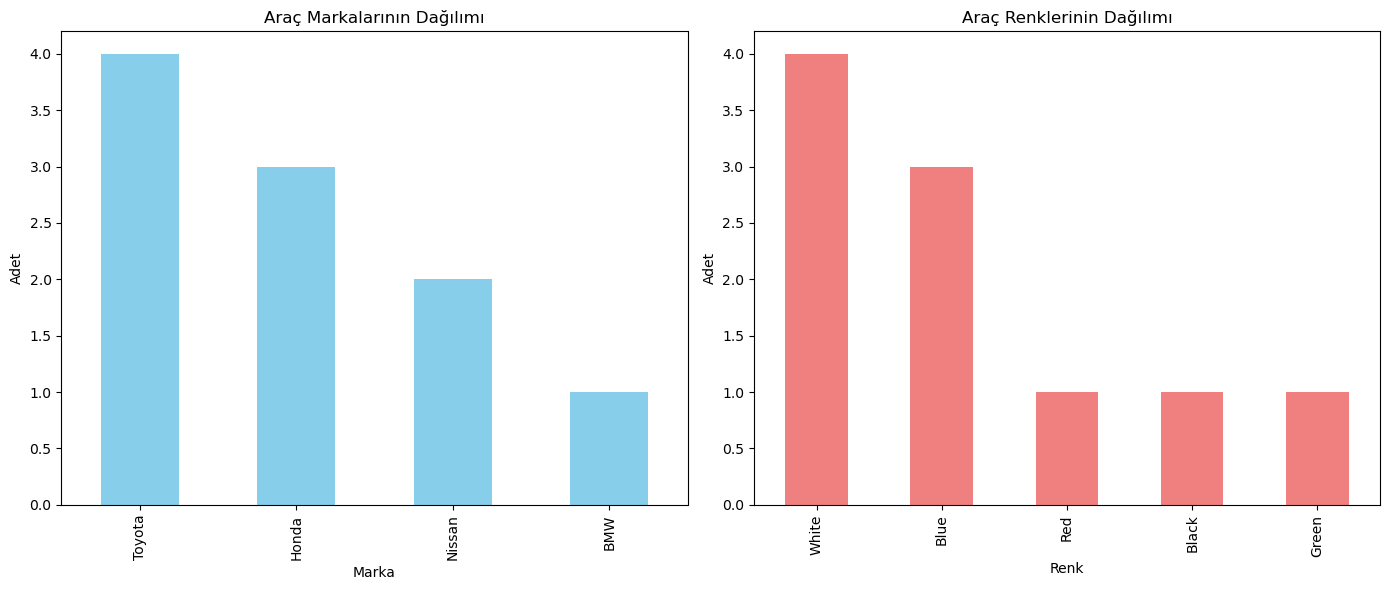

In [24]:
import matplotlib.pyplot as plt

# Marka ve renklerin dağılımını bar grafiği ile gösterme
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

df['Make'].value_counts().plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Araç Markalarının Dağılımı')
ax[0].set_xlabel('Marka')
ax[0].set_ylabel('Adet')

df['Colour'].value_counts().plot(kind='bar', ax=ax[1], color='lightcoral')
ax[1].set_title('Araç Renklerinin Dağılımı')
ax[1].set_xlabel('Renk')
ax[1].set_ylabel('Adet')

plt.tight_layout()
plt.show()


### Ortalama Fiyatlara Göre Araç Markaları

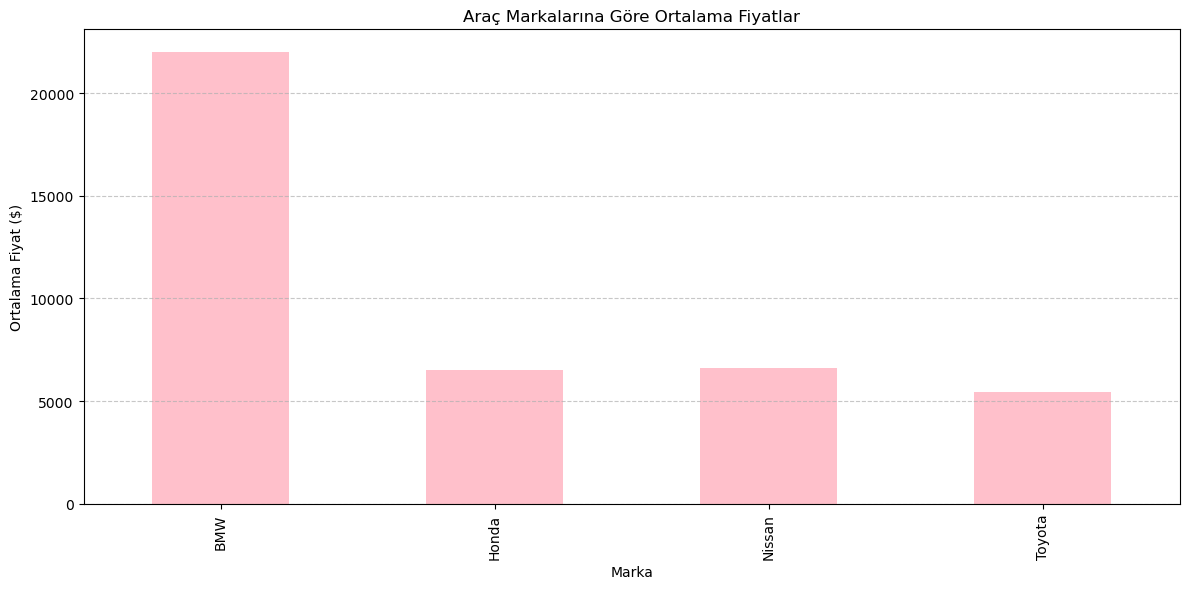

In [28]:
import matplotlib.pyplot as plt

avg_price_by_make = df.groupby('Make')['Price'].mean()

plt.figure(figsize=(12, 6))
avg_price_by_make.plot(kind='bar', color='pink')
plt.title('Araç Markalarına Göre Ortalama Fiyatlar')
plt.xlabel('Marka')
plt.ylabel('Ortalama Fiyat ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
